In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Import de l'image et binarisation 

image = cv2.imread('Test.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, image_binary) = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(50,25))
plt.imshow(image)
plt.show()

edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

plt.figure(figsize=(50,25))
plt.imshow(edges, cmap=plt.cm.gray)
plt.show()

In [ ]:
print(type(image))

In [ ]:
print(edges)

In [ ]:
print("longeur de y :", len(edges))
print("longeur de x :", len(edges[400]))

In [ ]:
for y in range(len(edges)) :
    for x in range(len(edges[y])) :
        if edges[y][x] != 0 :
            print(edges[y][x])

In [ ]:
edges[100][200]
edges[100][201]

In [ ]:
# Idée : transformer la matrice en des zéros et des 1
# Avec les cases noires étant 1 et les cases blanches étant des 0

In [ ]:
# But : obtenir les coordonées de tous les pixels qui doivent êtres colorés

In [ ]:
def flood_liste(image, x : int, y : int, liste : list) -> list :
    """
    Fonction qui permet, à partir d'un image déjà binarisée, d'obtenir une liste contenant les coordonées de tous les pixels à colorier pour
    remplir la forme géométrique
    """ 

    image[y][x] = 255
    liste.append([x,y])

    if y-1>= 0 :
        if image[y-1][x] == 0 :
            flood_liste(image, x, y-1, liste)

    if y+1<=len(image) :
        if image[y+1][x] == 0 :
            flood_liste(image, x, y+1, liste)
    if x-1>=0 :
        if image[y][x-1] == 0 :
            flood_liste(image, x-1, y, liste)
    if x+1<=len(image[0]) :
        if image[y][x+1] == 0 :
            flood_liste(image, x+1, y, liste)
    
    return liste


In [ ]:
liste = []
l = flood_liste(edges, 100, 200, liste)
print(l)

In [ ]:
def flood_liste(image, start_x: int, start_y: int):
    """
    Fonction qui permet, à partir d'un image déjà binarisée, d'obtenir une liste contenant les coordonnées de tous les pixels à colorier pour
    remplir la forme géométrique
    """ 
    height, width = image.shape[:2]
    stack = [(start_x, start_y)]
    fill_coords = []

    while stack:
        x, y = stack.pop()
        fill_coords.append((x, y))
        image[y][x] = 255  # Marquer le pixel comme visité

        # Vérifier les voisins et les ajouter à la pile s'ils sont non visités
        neighbors = [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]
        for neighbor_x, neighbor_y in neighbors:
            if (0 <= neighbor_x < width and 0 <= neighbor_y < height and image[neighbor_y][neighbor_x] == 0):
                stack.append((neighbor_x, neighbor_y))

    return fill_coords

import cv2

# Charger l'image binaire
image = cv2.imread('Test.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

plt.figure()
plt.imshow(edges)
plt.show()

# Définir les coordonnées de départ
start_x, start_y = 200, 100  # À remplacer par les coordonnées de départ souhaitées

# Obtenir les coordonnées de remplissage pour la forme géométrique
fill_coords = flood_liste(edges, start_x, start_y)

# Afficher les coordonnées de remplissage
print(fill_coords)

In [ ]:
for elt in edges :
    print(elt)

0 c'est noir

1 c'est blanc

In [ ]:
# Code du flood fill

binaire = edges.copy()

# Coordonées du point initial (en pixel)
x = ...
y = ...

liste_visites = []
liste_visites.append(x,y)


In [ ]:
def flood_fill(image, x, y):
    filled_pixels = set()  # Pour stocker les pixels déjà remplis
    stack = [(x, y)]  # Pile pour le remplissage par diffusion

    while stack:
        current_x, current_y = stack.pop()
        filled_pixels.add((current_x, current_y))

        # Ajoute les pixels voisins non remplis
        for dx, dy in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            new_x, new_y = current_x + dx, current_y + dy
            if (
                0 <= new_x < len(image)
                and 0 <= new_y < len(image[0])
                and (new_x, new_y) not in filled_pixels
                and image[new_x][new_y] == 0
            ):
                stack.append((new_x, new_y))

    return list(filled_pixels)

# Exemple d'utilisation
# Supposons que 'image' est votre matrice 2D avec les valeurs 0 et 1
# Supposons que (x, y) est la position initiale

image = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

x, y = 1, 1  # Position initiale

filled_pixels = flood_fill(image, x, y)
print("Pixels remplis:", filled_pixels)

In [ ]:
f = flood_fill(edges, 200, 200)
print(f)
print(len(f))

In [ ]:
def colorie_pixels(image, liste_pixels, couleur) :
    for x,y in liste_pixels :
        image[x][y] = couleur

In [ ]:
colorie_pixels(image, f, [120, 236, 100])

In [ ]:
plt.figure(figsize=(50,25))
plt.imshow(image)
plt.show()

In [1]:
from remplissage import flood_fill, colorie_pixels

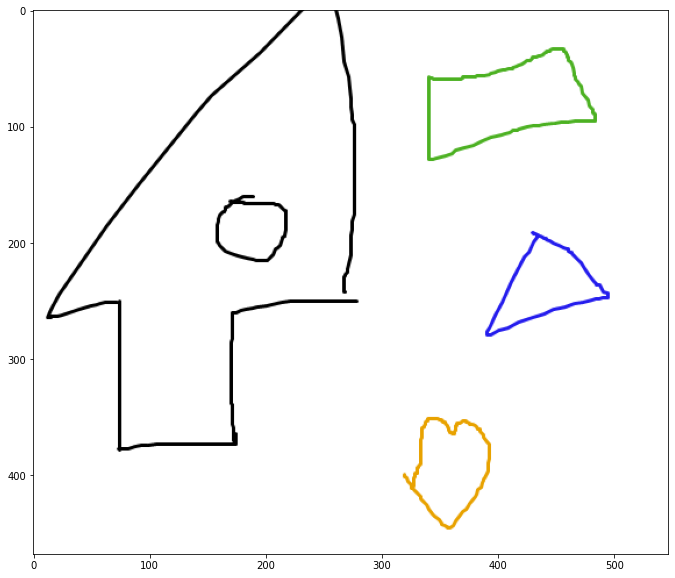

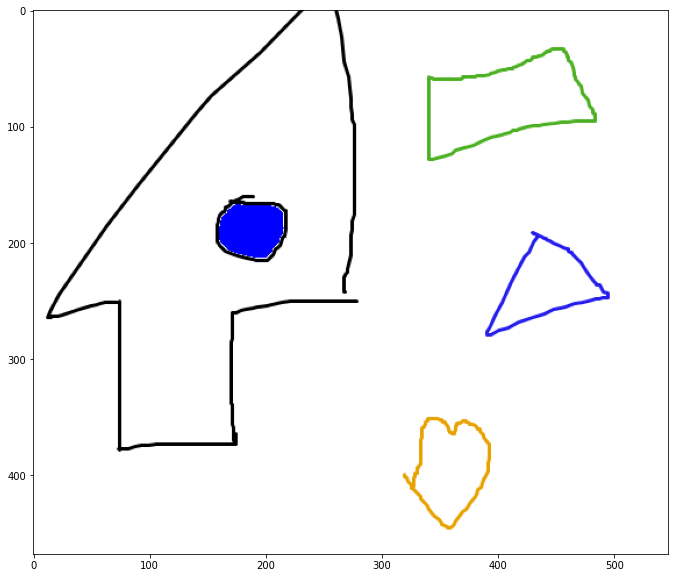

In [6]:
image = cv2.imread('Test.png')
edges = cv2.Canny(image=image, threshold1=100, threshold2=200)

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

liste = flood_fill(edges, 200, 200)

colorie_pixels(image, liste, [0, 0, 254])

plt.figure(figsize=(20,10))
plt.imshow(image)
plt.show()

In [7]:
print(type(edges))

<class 'numpy.ndarray'>
